Model 1 - K means Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X_train = pd.read_csv('preprocessed_train_data.csv')
Y_train = pd.read_csv('preprocessed_train_label.csv')
X_test = pd.read_csv('preprocessed_test_data.csv')
Y_test = pd.read_csv('preprocessed_test_label.csv')

In [ ]:
import ast
import re

def clean_text(row):
  letters = ast.literal_eval(row)
  text = "".join(letters)

  return text

X_train['recombined text'] = X_train['text'].apply(clean_text)
X_test['recombined text'] = X_test['text'].apply(clean_text)


In [ ]:
X_train

,Unnamed: 0,Class Index,text,recombined text
0,0,4,"['n', 'e', 'w', ' ', 'w', 'i', 'n', 'd', 'o', ...",new windows planned for 2006 microsoft corp. a...
1,1,1,"['i', 'n', 't', 'e', 'l', ""'"", 's', ' ', 'p', ...",intel's president is promoted to c.e.o. the pr...
2,2,1,"['p', 'e', 'n', 't', 'a', 'g', 'o', 'n', ' ', ...",pentagon expands outposts in middle east washi...
3,3,3,"['n', 'o', 'r', 't', 'e', 'l', ' ', 'c', 'u', ...","nortel cuts fewer jobs, exits real estate ott..."
4,4,2,"['v', 'i', 'j', 'a', 'y', ' ', 's', 'w', 'i', ...","vijay swings to \$10 m kitty vijay singh, fiji..."
...,...,...,...,...
59995,59995,2,"['a', 's', ' ', 'p', 'r', 'o', 'm', 'i', 's', ...","as promised, party was quite subdued foxboroug..."
59996,59996,2,"['n', 'o', '.', ' ', '1', ' ', 'i', 'l', 'l', ...","no. 1 illinois 74, georgetown 59 washington - ..."
59997,59997,1,"['t', 'h', 'e', ' ', 'f', 'i', 'r', 's', 't', ...",the first guantanamo trials are set to take pl...
59998,59998,4,"['e', '-', 'g', 'o', 'l', 'd', ' ', 't', 'r', ...",e-gold tracks cisco code thief the electronic ...


https://www.kaggle.com/code/jbencina/clustering-documents-with-tfidf-and-kmeans

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(max_features = 10000, stop_words = 'english', ngram_range = (1,2))
X_train_vec = vectoriser.fit_transform(X_train['recombined text'])
X_test_vec = vectoriser.transform(X_test['recombined text'])

In [ ]:
print(X_train_vec)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1306038 stored elements and shape (60000, 10000)>
  Coords	Values
  (0, 5959)	0.16562140190833474
  (0, 9792)	0.3157210967363801
  (0, 6649)	0.3528492036490464
  (0, 133)	0.36354004688336045
  (0, 5570)	0.12784205705353194
  (0, 2225)	0.119635679887195
  (0, 716)	0.13074928490798235
  (0, 9960)	0.11323997198995192
  (0, 5060)	0.1772777771586764
  (0, 3304)	0.18965592641399953
  (0, 5319)	0.13887484423098628
  (0, 6242)	0.16797263770028512
  (0, 5501)	0.1686049478118529
  (0, 3787)	0.1755146211500978
  (0, 7627)	0.22242113228131655
  (0, 9500)	0.1604312016224958
  (0, 7908)	0.12507770567111384
  (0, 3966)	0.1516859320810956
  (0, 5573)	0.16822388548320028
  (0, 2227)	0.23486219680969045
  (0, 725)	0.21813595514072584
  (0, 5995)	0.21347320341111697
  (0, 9501)	0.2241537385796197
  (0, 7912)	0.20198793282352864
  (1, 4506)	0.4815197870687764
  :	:
  (59998, 8350)	0.278902265540189
  (59998, 2118)	0.17694765820748207
  (59998, 

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/


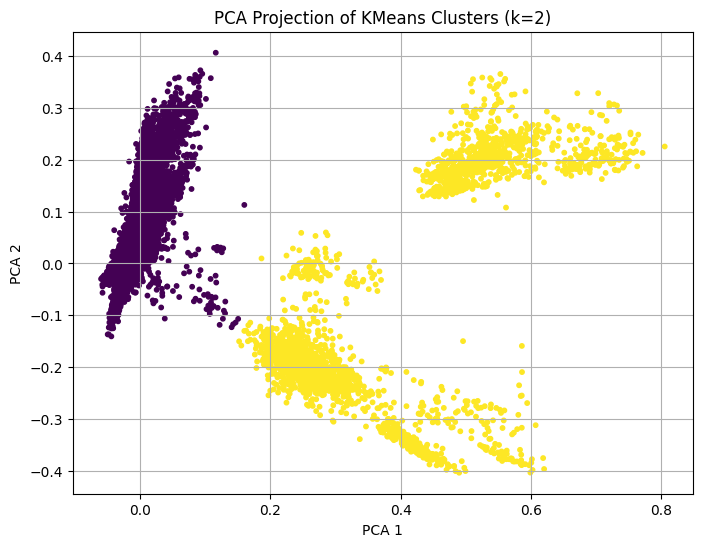

silhoutte score: 0.003961447803011458


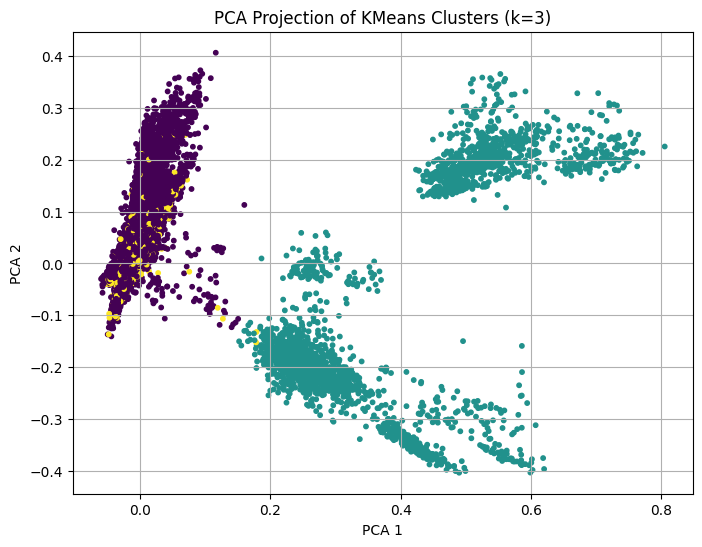

silhoutte score: 0.0040732646220986365


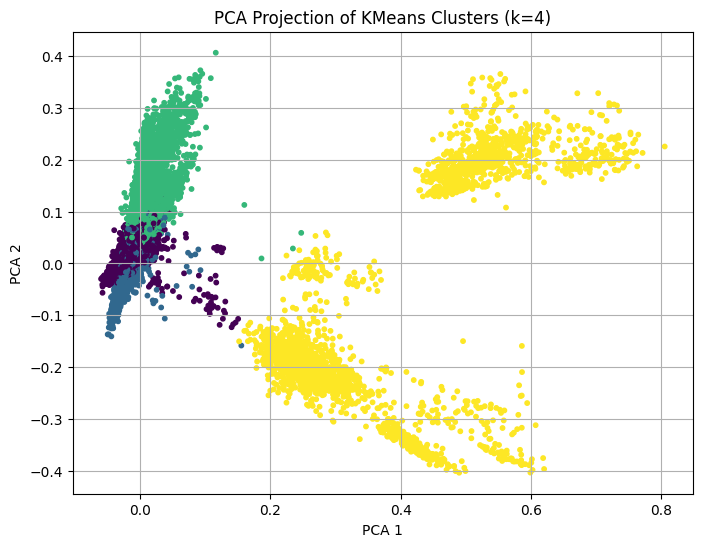

silhoutte score: 0.0053072404970351435


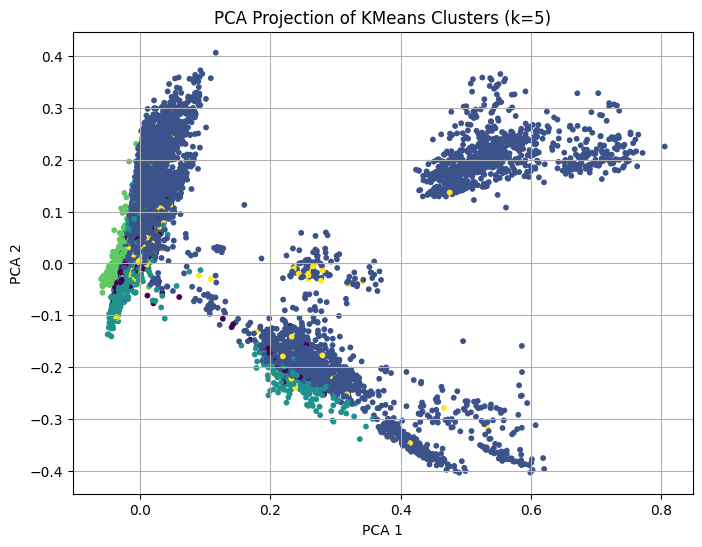

silhoutte score: 0.003903845180241812


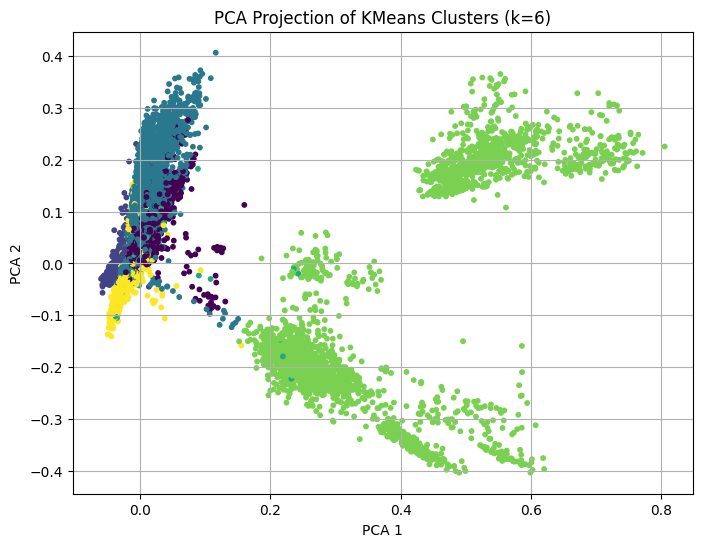

silhoutte score: 0.006888536813104101


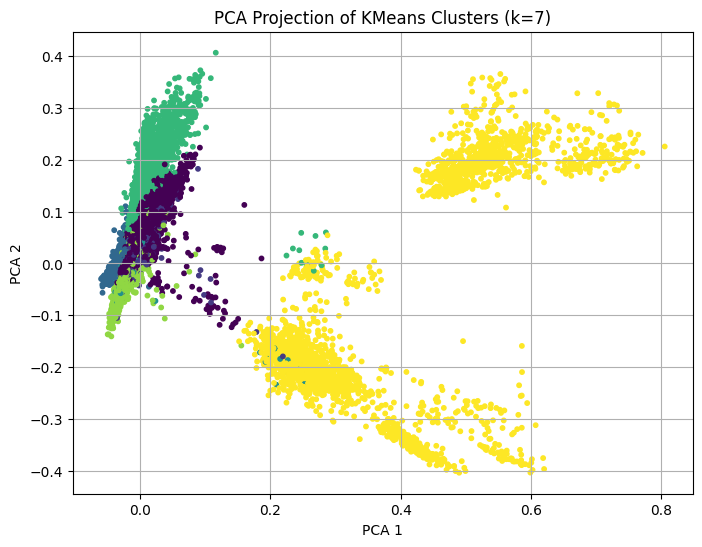

silhoutte score: 0.007407758454603574


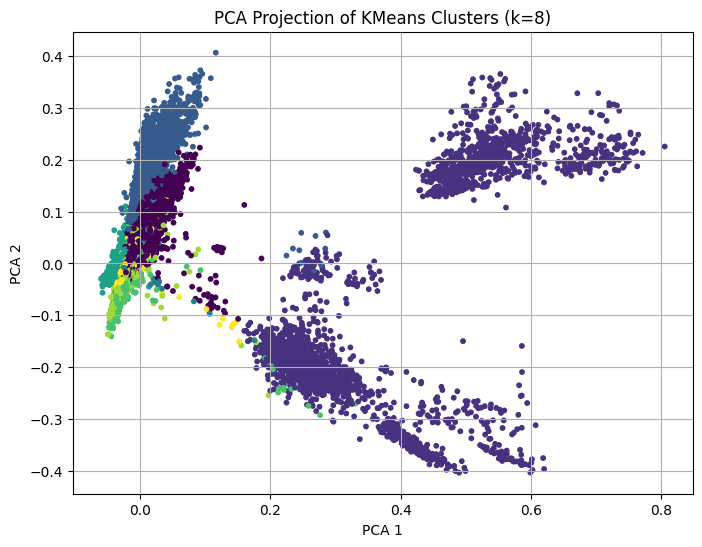

silhoutte score: 0.008282746155753945


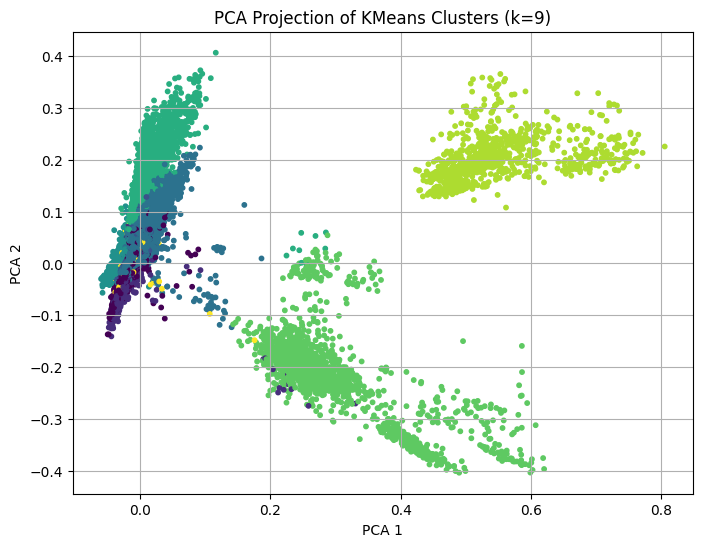

silhoutte score: 0.007352458733163333


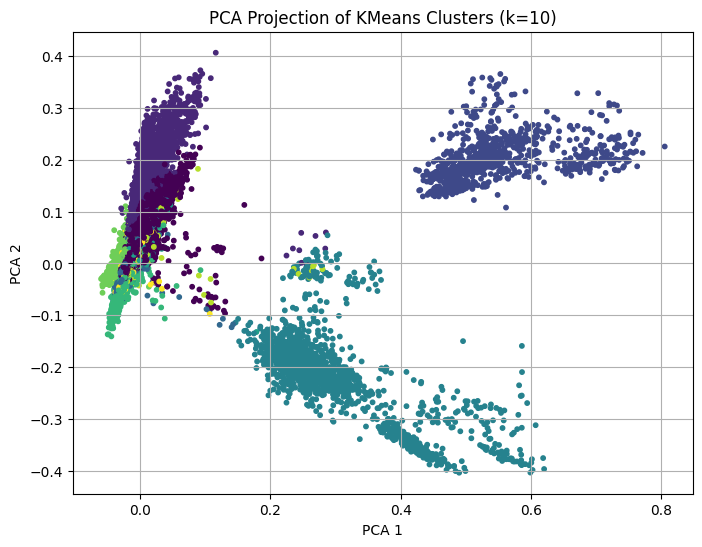

silhoutte score: 0.00755710955802985


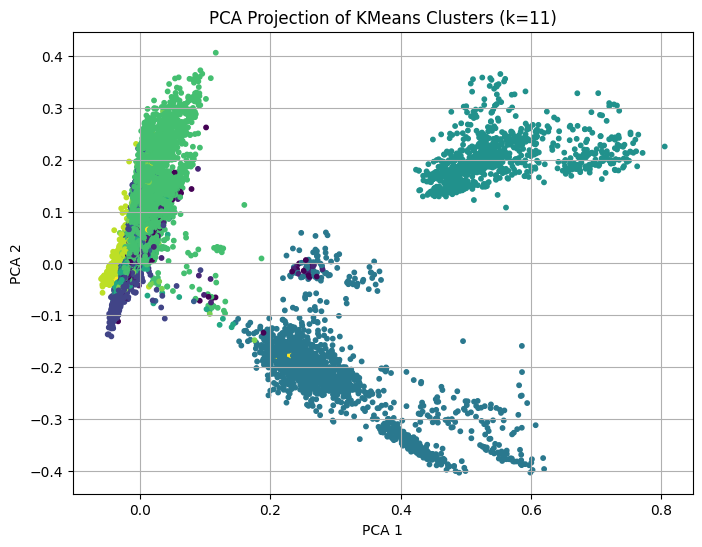

silhoutte score: 0.006958304768916993


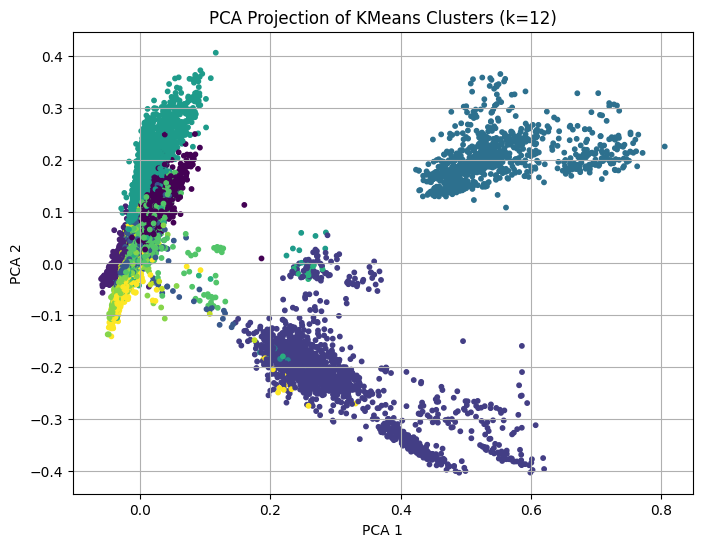

silhoutte score: 0.008994682070256943


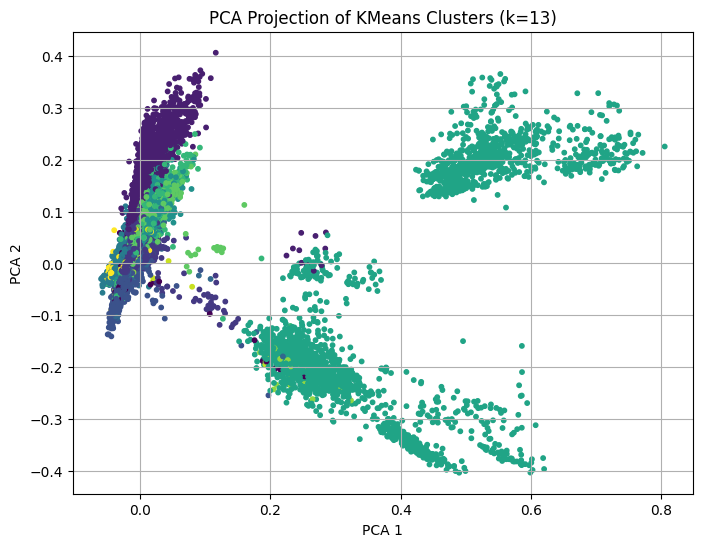

silhoutte score: 0.00891616715631411


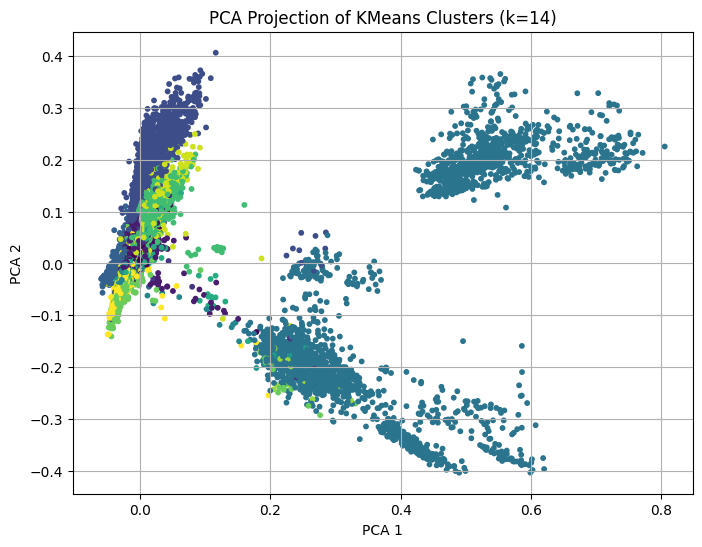

silhoutte score: 0.009976087886562646


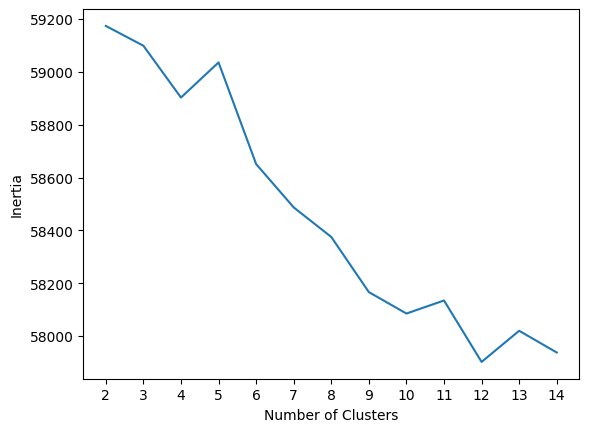

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 15)

for k in k_range:
  model = KMeans(n_clusters = k)
  model.fit(X_train_vec)
  inertia.append(model.inertia_)
  plt.figure(figsize=(8, 6))
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=model.labels_, cmap='viridis', s=10)
  plt.title(f"PCA Projection of KMeans Clusters (k={k})")
  plt.xlabel("PCA 1")
  plt.ylabel("PCA 2")
  plt.grid(True)
  plt.show()
  print('silhoutte score:', silhouette_score(X_train_vec, model.labels_))

sns.lineplot(x = k_range, y = inertia, markers='x' )
plt.xticks(k_range)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

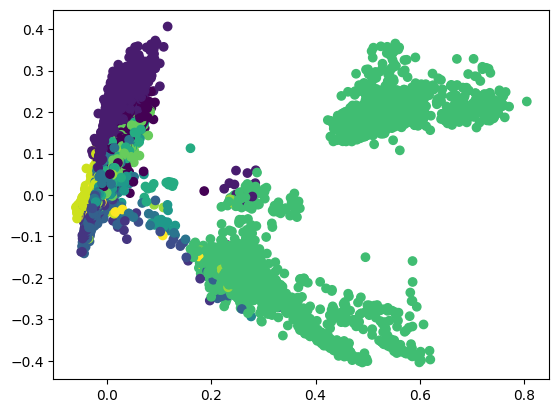

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_vec.toarray())

for k in k_range:




In [ ]:
kmeans = KMeans(n_clusters = 10, init='k-means++', max_iter=300, n_init=10, random_state=0)
predictions = kmeans.fit_predict(X_test_vec)



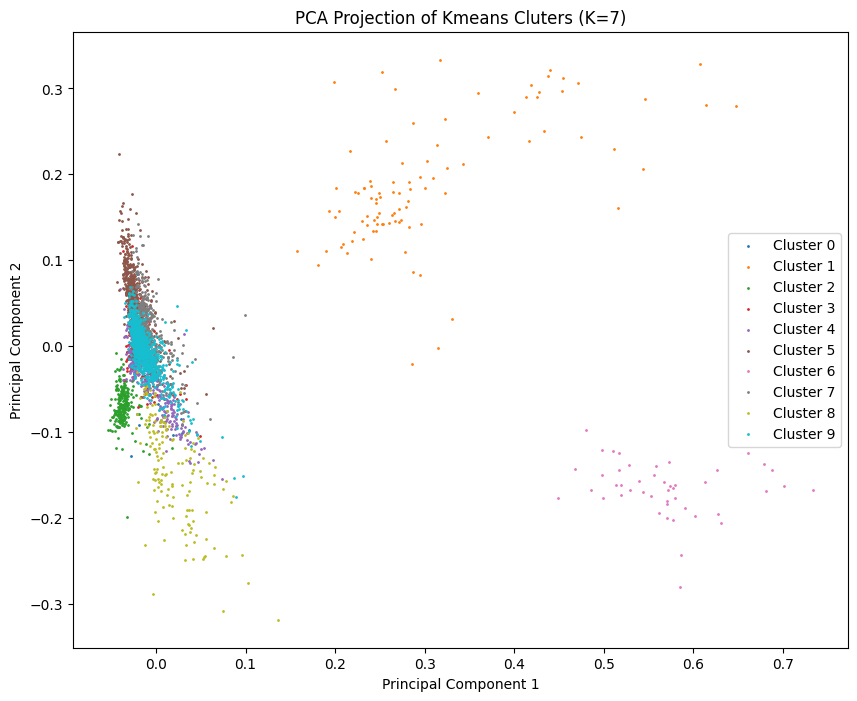

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_test_pca = pca.fit_transform(X_test_vec.toarray())

numclusters = 10
plt.figure(figsize = (10, 8))
for cluster in range(numclusters):
  plt.scatter(
      X_test_pca[predictions == cluster, 0],
      X_test_pca[predictions == cluster, 1],
      s = 1,
      label = f'Cluster {cluster}'
  )

plt.title("PCA Projection of Kmeans Cluters (K=7)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
score = silhouette_score(X_test_vec, predictions)

print(score)

0.006806356873792194
